In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import statsmodels.api as sm
from functools import reduce
from pathlib import Path

Import all of the goalie statistics from Natstattrick.com. There is definitely a more clean way to do this instead of doing it one by one, but that will be an area of improvement for next time.

In [3]:
nst_goalies_18 = pd.read_csv('nst_goalies_18.csv')
nst_goalies_19 = pd.read_csv('nst_goalies_19.csv')
nst_goalies_20 = pd.read_csv('nst_goalies_20.csv')
nst_goalies_21 = pd.read_csv('nst_goalies_21.csv')
nst_goalies_22 = pd.read_csv('nst_goalies_22.csv')
nst_goalies_23 = pd.read_csv('nst_goalies_23.csv')


Loop through each of the newly created datafames to remove columns that I didn't need to use and clean up some of the nomenclature for the remaining columns.

In [4]:
dfs = [nst_goalies_18,nst_goalies_19,nst_goalies_20,nst_goalies_21,nst_goalies_22,nst_goalies_23]

for df in dfs:
  df.drop(columns=['Unnamed: 0', 'Team', 'GP', 'TOI', 'Shots Against', 'Saves', 'Goals Against'], inplace=True)     
      
columns = list(nst_goalies_18.columns)

newlist=[]
for column in columns:
  for i in column:
    if i == '%':
      column = column.replace('%','Pct')
  newlist.append(column)
  
  
for df in dfs:
  df.columns = newlist       


Again, the following code boxes are certainly an area for improvement. For each dataframe I appended the year to the associated columns in preparation to merge the dataframes all together. Next time I will attempt to do this in a much cleaner fashion.

In [5]:
nst_goalies_merge = nst_goalies_18.merge(nst_goalies_19, how='outer', on='Player')
columns = list(nst_goalies_merge.columns)

columns = [col.replace('x', '18') if col[-1] == 'x' else col.replace('y', '19') if col[-1] == 'y' else col for col in columns]

nst_goalies_merge.columns = columns


In [6]:
columns = list(nst_goalies_20.columns)

columns = [f"{col}{'_20'}" if col != 'Player' else col for col in columns]
nst_goalies_20.columns = columns

In [7]:
nst_goalies_merge = nst_goalies_merge.merge(nst_goalies_20, how='outer', on='Player')

In [8]:
columns = list(nst_goalies_21.columns)

columns = [f"{col}{'_21'}" if col != 'Player' else col for col in columns]
nst_goalies_21.columns = columns

In [9]:
nst_goalies_merge = nst_goalies_merge.merge(nst_goalies_21, how='outer', on='Player')

In [10]:
columns = list(nst_goalies_22.columns)

columns = [f"{col}{'_22'}" if col != 'Player' else col for col in columns]
nst_goalies_22.columns = columns

In [11]:
nst_goalies_merge = nst_goalies_merge.merge(nst_goalies_22, how='outer', on='Player')


In [12]:
columns = list(nst_goalies_23.columns)

columns = [f"{col}{'_23'}" if col != 'Player' else col for col in columns]
nst_goalies_23.columns = columns

In [13]:
nst_goalies_merge = nst_goalies_merge.merge(nst_goalies_23, how='outer', on='Player')

Taking the giant merged dataframe and paring it down some. Probably a step that was not needed, but I think that is one of the things that I am learning most from this. Take the time to figure out my steps beforehand which should save me extra work. 

I just wanted some specific columns from each of the dataframes because I knew that I wanted to make some kind of visualization that had to do with each players lowest and highest save percentage over the years.

In [14]:
sv_pct_df = nst_goalies_merge[['Player', 'SVPct_18','SVPct_19', 'SVPct_20', 'SVPct_21', 'SVPct_22', 'GSAA_18', 'GSAA_19', 'GSAA_20', 'GSAA_21', 'GSAA_22']]

In [15]:
sv_pct_df['SVPct_Max'] = sv_pct_df.loc[:,['SVPct_18', 'SVPct_19', 'SVPct_20', 'SVPct_21', 'SVPct_22']].max(axis=1)
sv_pct_df['SVPct_Min'] = sv_pct_df.loc[:,['SVPct_18', 'SVPct_19', 'SVPct_20', 'SVPct_21', 'SVPct_22']].min(axis=1)
sv_pct_df['SVPct_Diff'] = sv_pct_df['SVPct_Max'] - sv_pct_df['SVPct_Min']
sv_pct_df['GSAA_Total'] = sv_pct_df.loc[:, ['GSAA_18',	'GSAA_19',	'GSAA_20',	'GSAA_21',	'GSAA_22']].sum(axis=1)

In [16]:
non_zero = pd.DataFrame(sv_pct_df[sv_pct_df['SVPct_Diff'] != 0]).reset_index()
non_zero.drop(columns=['index'], inplace= True)

In [17]:
non_zero.drop([69,70,71], inplace= True)

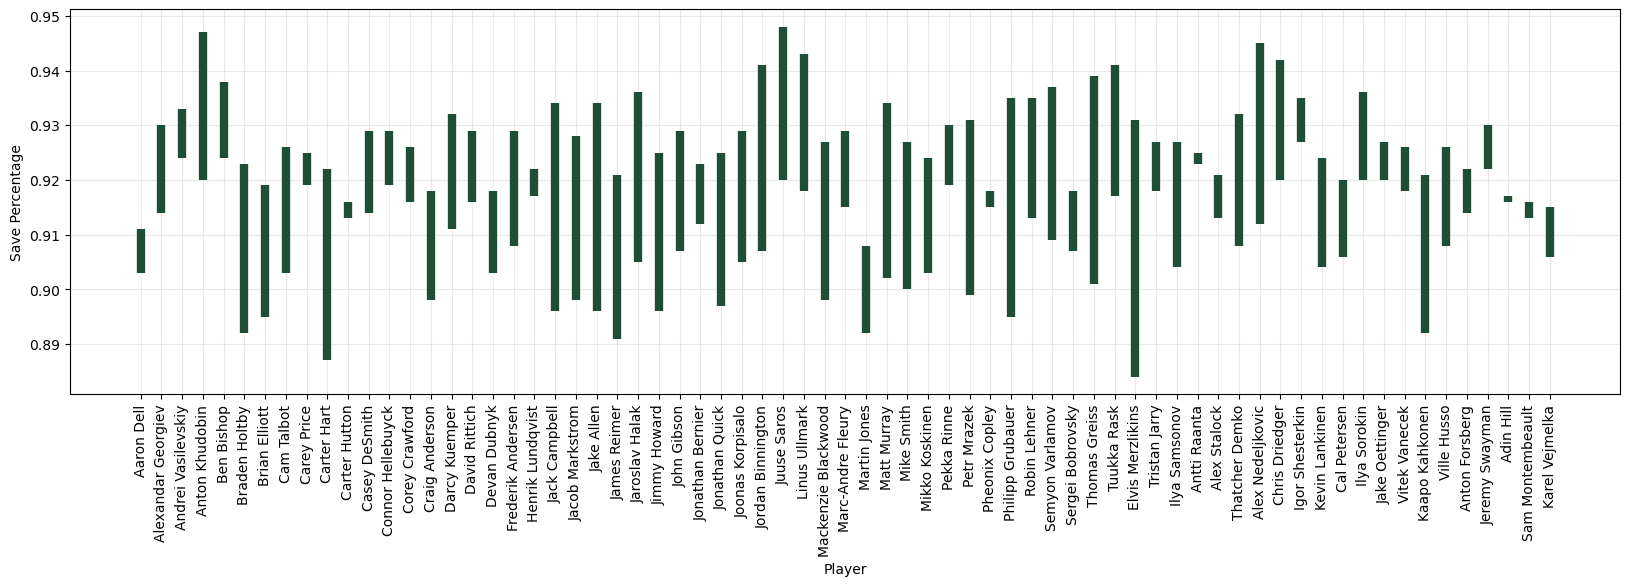

<Figure size 640x480 with 0 Axes>

In [18]:
fig,ax = plt.subplots(figsize=(20,5))

for i, row in non_zero.iterrows():
  plt.vlines(x=i, ymin=row['SVPct_Min'], ymax=row['SVPct_Max'], lw=6, zorder=2, colors='#1e4e36')

x=range(len(non_zero))
plt.xticks(x, non_zero['Player'], rotation=90)
plt.xlabel('Player')
plt.ylabel('Save Percentage')
plt.grid(True, color='lightgrey', alpha=.5)

plt.show()
plt.clf()

Same comments as above. Figure out how to do this in one step next time.

This is the data for the goalie salaries for the years we are looking at.

In [19]:
goalie_salary_18 = pd.read_csv('goalie_salary_18.csv')
goalie_salary_19 = pd.read_csv('goalie_salary_19.csv')
goalie_salary_20 = pd.read_csv('goalie_salary_20.csv')
goalie_salary_21 = pd.read_csv('goalie_salary_21.csv')
goalie_salary_22 = pd.read_csv('goalie_salary_22.csv')
goalie_salary_23 = pd.read_csv('goalie_salary_23.csv')


Removing symbols and unnecessary spaces from the data.

In [20]:
dfs = [goalie_salary_23,goalie_salary_22,goalie_salary_21,goalie_salary_20,goalie_salary_19,goalie_salary_18]

for df in dfs:
  df['Cap_Hit'] = df['Cap_Hit'].replace(r'[$,]', '', regex=True)
  df['Cap_Hit'] = df['Cap_Hit'].astype('int')
  df['Player'] = df['Player'].replace(r'[\d\d.]', '', regex=True)
  
for df in dfs:
  df['Player'] = df['Player'].str.lstrip()   

I created a small dataframe just so that I could reference the yearly average Cap Hit. The Avg_Coef was my attempt at starting to do some regression analysis which I abandoned, because I am not there yet with my understanding of those kind of methods. 

In [21]:
dfs = [goalie_salary_23,goalie_salary_22,goalie_salary_21,goalie_salary_20,goalie_salary_19,goalie_salary_18]

yearly_cap_avg = []

for df in dfs:
  year = 2023
  col_avg = round(df['Cap_Hit'].mean())
  yearly_cap_avg.append([year, col_avg])
  year-=1
  df['Difference_From_Avg'] = df['Cap_Hit'] - col_avg
  df['Difference_From_Avg'] = df['Difference_From_Avg'].astype('int')
  df['Avg_Coef'] = col_avg/df['Cap_Hit']

     
yearly_cap_avg = pd.DataFrame(yearly_cap_avg, columns=['Year', 'Avg Cap Hit'])

In [22]:
yearly_cap_avg = yearly_cap_avg.set_index('Year')

Again, the next few code boxes are me trying to figure out a way to come up with some kind of statistic or regression that would indicate a players GSAA compared to the difference between their cap hit and the average goalie salary for that year.

In [23]:
nst_goalies_22[nst_goalies_22['Player'] == 'Connor Ingram']['GSAA_22'].values[0]*goalie_salary_22[goalie_salary_22['Player'] == 'Connor Ingram']['Avg_Coef'].values[0]

16.375266693303043

In [24]:
nst_goalies_22[nst_goalies_22['Player'] == 'Connor Hellebuyck']['GSAA_22'].values[0]*goalie_salary_22[goalie_salary_22['Player'] == 'Connor Hellebuyck']['Avg_Coef'].values[0]

9.402812447956084

In [25]:
nst_goalies_22[nst_goalies_22['Player'] == 'Connor Ingram']['GSAA_22']

20    3.85
Name: GSAA_22, dtype: float64

In [26]:
nst_goalies_22[nst_goalies_22['Player'] == 'Sergei Bobrovsky']['GSAA_22'].values[0]

3.54

In [27]:
merge_18 = nst_goalies_18.merge(goalie_salary_18, how='inner', on='Player')
merge_19 = nst_goalies_19.merge(goalie_salary_19, how='inner', on='Player')
merge_20 = nst_goalies_20.merge(goalie_salary_20, how='inner', on='Player')
merge_21 = nst_goalies_21.merge(goalie_salary_21, how='inner', on='Player')
merge_22 = nst_goalies_22.merge(goalie_salary_22, how='inner', on='Player')
merge_23 = nst_goalies_23.merge(goalie_salary_23, how='inner', on='Player')

Merged all of the salary data and the statistical data into a different dataframe for each year we have data on.

And below I looped through all of the dataframes to find each unique goalie and placed that player into a new list as part of a dict. I then looped through each dataframe again to build the totals for the indicated statistics.

In [153]:
dfs = [merge_18,merge_19,merge_20,merge_21,merge_22,merge_23]

playerList = [{'Player': 'each', 'GSAA': 0, 'Cap_Hit_Difference_From_Avg' : 0, 'Years': 0}]

for df in dfs:
  for each in df['Player']:
    for idx in range(len(playerList)):
      if not any(d['Player'] == each for d in playerList):
        playerList.append({'Player': each, 'GSAA': 0, 'Cap_Hit_Difference_From_Avg' : 0, 'Years': 0})

for df in dfs:
  for idx, row in df.iterrows():
    for index in range(len(playerList)):
     if row['Player'] == playerList[index]['Player']:
      playerList[index]['Years'] += 1
      playerList[index]['GSAA'] += row[df.columns[3]]
      playerList[index]['GSAA'] = round(playerList[index]['GSAA'], 2)
      playerList[index]['Cap_Hit_Difference_From_Avg'] += row['Difference_From_Avg']
      playerList[index]['Cap_Hit_Difference_From_Avg'] = round(playerList[index]['Cap_Hit_Difference_From_Avg']/playerList[index]['Years'], 2)
      playerList[index]['Wins_Above_Average'] = round(playerList[index]['GSAA']/3, 2)
      playerList[index]['Avg_Wins_Above_Average'] = round(playerList[index]['Wins_Above_Average']/playerList[index]['Years'], 2)
      # proj_cap_hit = round(row[df.columns[3]]/3,2)
      # playerList[index]['Proj_Cap_Hit'] += proj_cap_hit
      # cap_hit_minus = proj_cap_hit - (row[df.columns[6]]/1000000)
      # playerList[index]['Proj_Cap_Hit_Minus_Cap_Hit'] += cap_hit_minus

Used the playerList that I built above to create a new dataframe with the accumulated information.

In [154]:
GSAA_Cap_Hit = pd.DataFrame.from_dict(playerList)
GSAA_Cap_Hit.drop([0], inplace=True)

The following dataframe shows the accumulated GSAA for each goalie in our data over the time that we are looking at. It also totals the yearly average difference between their cap hit and the average goalie cap hit. 

In [156]:
GSAA_Cap_Hit.sort_values('GSAA', ascending=False)

,Player,GSAA,Cap_Hit_Difference_From_Avg,Years,Wins_Above_Average,Avg_Wins_Above_Average
15,Connor Hellebuyck,71.13,602474.23,6,23.71,3.95
34,Juuse Saros,69.49,333492.68,6,23.16,3.86
65,Ilya Sorokin,63.89,186237.83,4,21.30,5.33
4,Andrei Vasilevskiy,63.40,1298770.46,6,21.13,3.52
36,Linus Ullmark,51.83,405212.99,5,17.28,3.46
...,...,...,...,...,...,...
8,Brian Elliott,-24.84,-828593.71,4,-8.28,-2.07
31,Jonathan Quick,-30.95,1086715.62,4,-10.32,-2.58
18,Craig Anderson,-31.65,-496617.71,4,-10.55,-2.64
27,James Reimer,-32.01,-226101.59,5,-10.67,-2.13


In [157]:
filepath = Path('/Users/arthurloefstedt/Desktop/python-data/blog_2/GSAA_Cap_Hit_Table.csv')
GSAA_Cap_Hit.to_csv(filepath)

In [32]:
GSAA_Cap_Hit[(GSAA_Cap_Hit['GSAA'] < 0) & (GSAA_Cap_Hit['Avg_Cap_Hit_Difference'] < 0)].sort_values('GSAA').set_index('Player')


,GSAA,Avg_Cap_Hit_Difference,Years
Player,,,
Martin Jones,-81.29,-210268.26,5
James Reimer,-32.01,-226101.59,5
Craig Anderson,-31.65,-496617.71,4
Brian Elliott,-24.84,-828593.71,4
Braden Holtby,-19.63,-23910.96,4
Spencer Martin,-17.83,-2356597.00,1
Keith Kinkaid,-15.76,-2086319.00,1
Ukko-Pekka Luukkonen,-15.37,-2420603.00,2
Mike Smith,-15.23,-396133.17,4


In [33]:
GSAA_Cap_Hit[(GSAA_Cap_Hit['GSAA'] > 0) & (GSAA_Cap_Hit['Avg_Cap_Hit_Difference'] > 0)].sort_values('GSAA', ascending=False)


,Player,GSAA,Avg_Cap_Hit_Difference,Years
15,Connor Hellebuyck,71.13,602474.23,6
34,Juuse Saros,69.49,333492.68,6
65,Ilya Sorokin,63.89,186237.83,4
4,Andrei Vasilevskiy,63.40,1298770.46,6
36,Linus Ullmark,51.83,405212.99,5
62,Igor Shesterkin,43.55,766446.29,4
59,Thatcher Demko,36.32,402106.67,5
54,Tristan Jarry,32.84,394398.33,5
52,Tuukka Rask,26.75,2279722.17,3
6,Ben Bishop,24.52,1489911.50,2


Throughout this I looked at the R2 and the correlation for my data to give me an idea of the relationship between the variables. That was my intention was to examine exactly how goalies were being paid in relationship to their performance.

In [34]:
cap_hit_GSAA_model = sm.OLS.from_formula('GSAA ~ Avg_Cap_Hit_Difference', data=GSAA_Cap_Hit).fit()
print(cap_hit_GSAA_model.summary())
params = cap_hit_GSAA_model.params
print(params)

                            OLS Regression Results                            
Dep. Variable:                   GSAA   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.081
Date:                Thu, 15 Feb 2024   Prob (F-statistic):             0.0827
Time:                        14:57:38   Log-Likelihood:                -405.81
No. Observations:                  90   AIC:                             815.6
Df Residuals:                      88   BIC:                             820.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

Do I even need to comment on this again? I will figure out a better way next time.

In [35]:
columns_18 = list(goalie_salary_18.columns)
columns_18 = [f"{col}{'_18'}" if col != 'Player' else col for col in columns_18]
goalie_salary_18.columns = columns_18

In [36]:
columns_19 = list(goalie_salary_19.columns)
columns_19 = [f"{col}{'_19'}" if col != 'Player' else col for col in columns_19]
goalie_salary_19.columns = columns_19

In [37]:
columns_20 = list(goalie_salary_20.columns)
columns_20 = [f"{col}{'_20'}" if col != 'Player' else col for col in columns_20]
goalie_salary_20.columns = columns_20

In [38]:
columns_21 = list(goalie_salary_21.columns)
columns_21 = [f"{col}{'_21'}" if col != 'Player' else col for col in columns_21]
goalie_salary_21.columns = columns_21

In [39]:
columns_22 = list(goalie_salary_22.columns)
columns_22 = [f"{col}{'_22'}" if col != 'Player' else col for col in columns_22]
goalie_salary_22.columns = columns_22

In [40]:
columns_23 = list(goalie_salary_23.columns)
columns_23 = [f"{col}{'_23'}" if col != 'Player' else col for col in columns_23]
goalie_salary_23.columns = columns_23

In [41]:
dfs= [goalie_salary_18, goalie_salary_19, goalie_salary_20, goalie_salary_21, goalie_salary_22, goalie_salary_23]

goalie_salary_merge = reduce(lambda df_left, df_right: pd.merge(df_left, df_right, how='outer', on='Player'), dfs)

In [42]:
nst_goalies = nst_goalies_merge.merge(goalie_salary_merge, how='outer', on='Player')

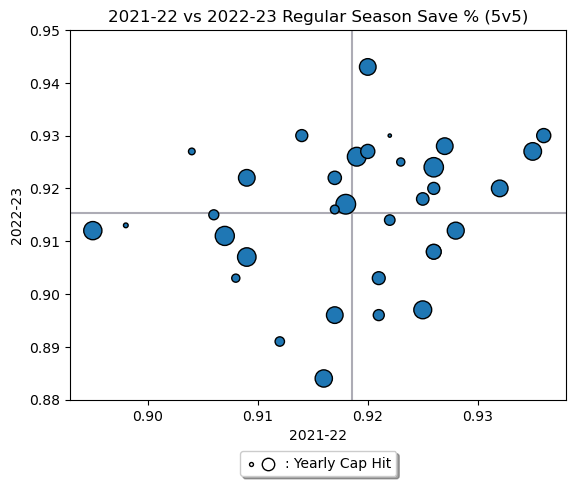

<Figure size 640x480 with 0 Axes>

In [58]:
sv_pct = sv_pct_df[['Player', 'SVPct_21', 'SVPct_22']].dropna()
cap_hit_22 = goalie_salary_22[['Player', 'Cap_Hit_22']].dropna()
scatter_merge = sv_pct.merge(cap_hit_22, how='inner', on='Player')

def find_CAP_percentile(player_value):
  result_list = []
  for index in range(0, len(scatter_merge)):
    if scatter_merge['Cap_Hit_22'].iat[index] <= player_value:
     result_list.append(scatter_merge['Cap_Hit_22'].iat[index])
    else:
     continue
  
  percentile = (len(result_list))/len(scatter_merge) * 100
  return percentile

point_size = [(find_CAP_percentile(x) * 2) for x in scatter_merge['Cap_Hit_22']]
avg_21 = scatter_merge['SVPct_21'].mean()
avg_22 = scatter_merge['SVPct_22'].mean()

fig, ax = plt.subplots()

l1 = plt.scatter([], [], s= 8, edgecolors='black', c='white')
l2 = plt.scatter([], [], s= 80, edgecolors='black', c='white')

ax.scatter(x='SVPct_21', y='SVPct_22', data=scatter_merge, s=point_size, edgecolors='black',)
ax.axvline(avg_21,zorder=0, color='#ADACB5')
ax.axhline(avg_22,zorder=0, color='#ADACB5')

ax.set_xlabel('2021-22')
ax.set_ylabel('2022-23')
ax.set_title('2021-22 vs 2022-23 Regular Season Save % (5v5)')
ax.set_ylim([.88,.95])

plt.legend([(l1,l2)], [': Yearly Cap Hit'], handler_map={tuple: HandlerTuple(ndivide=None)}, loc='upper center', bbox_to_anchor=(.5,-.12), ncols=1, fancybox= True, shadow=True)



plt.show()
plt.clf()


In [44]:
skater_21 = pd.read_csv('skater_21.csv')
skater_21 = skater_21[skater_21['TOI'] > 800]

skater_22 = pd.read_csv('skater_22.csv')
skater_22 = skater_22[skater_22['TOI'] > 800]

skaters = skater_22.merge(skater_21, how='inner', on='Player')

skaters = skaters[['Player', 'Total Points_x', 'Total Points_y']]
skaters = skaters.rename(columns={'Total Points_x' : 'Total_Points_22', 'Total Points_y' : 'Total_Points_21'})
skaters.head()

,Player,Total_Points_22,Total_Points_21
0,Nathan MacKinnon,65,50
1,Erik Karlsson,64,20
2,David Pastrnak,61,43
3,Brayden Point,59,30
4,Connor McDavid,59,58


In [45]:
skater_contracts = pd.read_csv('skater_contracts_22.csv')

skater_contracts['Cap_Hit'] = skater_contracts['Cap_Hit'].replace(r'[$,]', '', regex=True)
skater_contracts['Cap_Hit'] = skater_contracts['Cap_Hit'].astype('int')
skater_contracts['Player'] = skater_contracts['Player'].replace(r'[\d\d.]', '', regex=True)

In [46]:
skater_contracts['Player'] = skater_contracts['Player'].str.lstrip() 

In [47]:
skaters = skaters.merge(skater_contracts, how='inner', on='Player')

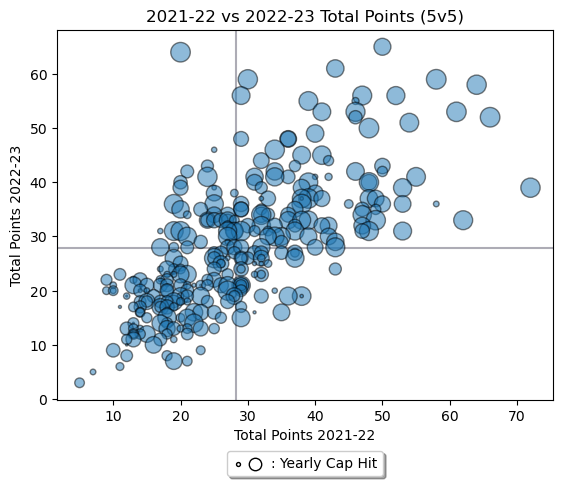

<Figure size 640x480 with 0 Axes>

In [57]:
def find_CAP_percentile(player_value):
  result_list = []
  for index in range(0, len(skaters)):
    if skaters['Cap_Hit'].iat[index] <= player_value:
     result_list.append(skaters['Cap_Hit'].iat[index])
    else:
     continue
  
  percentile = (len(result_list))/len(skaters) * 100
  return percentile
  
point_size = [(find_CAP_percentile(x) * 2) for x in skaters['Cap_Hit']]

avg_21 = skaters['Total_Points_21'].mean()
avg_22 = skaters['Total_Points_22'].mean()

fig, ax = plt.subplots()

l1 = plt.scatter([], [], s= 8, edgecolors='black', c='white')
l2 = plt.scatter([], [], s= 80, edgecolors='black', c='white')

ax.scatter('Total_Points_21', 'Total_Points_22', data=skaters, s=point_size, alpha=.5, edgecolors='black')
ax.axvline(avg_21,zorder=0, color='#ADACB5')
ax.axhline(avg_22,zorder=0, color='#ADACB5')

ax.set_xlabel('Total Points 2021-22')
ax.set_ylabel('Total Points 2022-23')
ax.set_title('2021-22 vs 2022-23 Total Points (5v5)')

plt.legend([(l1,l2)], [': Yearly Cap Hit'], handler_map={tuple: HandlerTuple(ndivide=None)}, loc='upper center', bbox_to_anchor=(.5,-.12), ncols=1, fancybox= True, shadow=True)

plt.show()
plt.clf()

In [49]:
total_points_model = sm.OLS.from_formula('Total_Points_22 ~ Total_Points_21', data=skaters).fit()
print(total_points_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Total_Points_22   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     271.6
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           6.22e-44
Time:                        14:57:38   Log-Likelihood:                -1082.3
No. Observations:                 303   AIC:                             2169.
Df Residuals:                     301   BIC:                             2176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.5338      1.270     

In [50]:
sv_pct_21_22_model = sm.OLS.from_formula('SVPct_22 ~ SVPct_21', data=scatter_merge).fit()
print(sv_pct_21_22_model.summary())

                            OLS Regression Results                            
Dep. Variable:               SVPct_22   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.560
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.220
Time:                        14:57:38   Log-Likelihood:                 104.12
No. Observations:                  35   AIC:                            -204.2
Df Residuals:                      33   BIC:                            -201.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6551      0.208      3.143      0.0

In [51]:
gsaa_df = sv_pct_df[['Player', 'GSAA_18', 'GSAA_19', 'GSAA_20', 'GSAA_21', 'GSAA_22']].dropna()

In [52]:
gsaa_model = sm.OLS.from_formula('GSAA_22 ~ GSAA_21', data=gsaa_df).fit()
print(gsaa_model.summary())

                            OLS Regression Results                            
Dep. Variable:                GSAA_22   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9932
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.334
Time:                        14:57:38   Log-Likelihood:                -70.645
No. Observations:                  18   AIC:                             145.3
Df Residuals:                      16   BIC:                             147.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9084      3.140     -0.926      0.3

/Users/arthurloefstedt/Desktop/python-data/env/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Wanted to see the relationship was between the different cost groups. To see if those that were getting paid more were averaging better results.

In [53]:
cost_group_df = nst_goalies[['Player', 'SVPct_22', 'Cap_Hit_22', 'GSAA_22']].dropna()

goalie_salary_q1_22 = np.quantile(cost_group_df['Cap_Hit_22'], .25)
goalie_salary_q2_22 = np.quantile(cost_group_df['Cap_Hit_22'], .5)
goalie_salary_q3_22 = np.quantile(cost_group_df['Cap_Hit_22'], .75)


goalie_cost_list = []

for index in range(0, len(cost_group_df)):
  if cost_group_df['Cap_Hit_22'].iat[index] <= goalie_salary_q1_22:
    goalie_cost_list.append([cost_group_df['Player'].iat[index], cost_group_df['SVPct_22'].iat[index], cost_group_df['Cap_Hit_22'].iat[index], cost_group_df['GSAA_22'].iat[index], 'Low Cost'])
  elif (cost_group_df['Cap_Hit_22'].iat[index] > goalie_salary_q1_22) & (cost_group_df['Cap_Hit_22'].iat[index] <= goalie_salary_q2_22):
    goalie_cost_list.append([cost_group_df['Player'].iat[index], cost_group_df['SVPct_22'].iat[index], cost_group_df['Cap_Hit_22'].iat[index], cost_group_df['GSAA_22'].iat[index], 'Low Medium Cost'])
  elif (cost_group_df['Cap_Hit_22'].iat[index] > goalie_salary_q2_22) & (cost_group_df['Cap_Hit_22'].iat[index] <= goalie_salary_q3_22):
    goalie_cost_list.append([cost_group_df['Player'].iat[index], cost_group_df['SVPct_22'].iat[index], cost_group_df['Cap_Hit_22'].iat[index], cost_group_df['GSAA_22'].iat[index], 'High Medium Cost'])
  else:
    goalie_cost_list.append([cost_group_df['Player'].iat[index], cost_group_df['SVPct_22'].iat[index], cost_group_df['Cap_Hit_22'].iat[index], cost_group_df['GSAA_22'].iat[index], 'High Cost'])

In [54]:
goalie_cost_groups = pd.DataFrame(goalie_cost_list, columns= ['Player', 'SVPct_22', 'Cap_Hit_22', 'GSAA_22', 'Cost_Group'])

In [55]:
goalie_cost_groups['Cost_Group'] = pd.Categorical(goalie_cost_groups['Cost_Group'], ['Low Cost', 'Low Medium Cost', 'High Medium Cost', 'High Cost'], ordered=True )
goalie_cost_groups.sort_values(['Cost_Group'])

,Player,SVPct_22,Cap_Hit_22,GSAA_22,Cost_Group
47,Spencer Martin,0.888,762500.0,-17.83,Low Cost
45,Charlie Lindgren,0.903,1100000.0,-7.63,Low Cost
2,Brian Elliott,0.906,900000.0,-4.69,Low Cost
44,Pyotr Kochetkov,0.913,842500.0,-0.86,Low Cost
43,Connor Ingram,0.920,733333.0,3.85,Low Cost
42,Logan Thompson,0.922,766667.0,6.65,Low Cost
41,Stuart Skinner,0.926,750000.0,14.28,Low Cost
40,Filip Gustavsson,0.939,787500.0,22.43,Low Cost
46,Ukko-Pekka Luukkonen,0.898,837500.0,-13.12,Low Cost
21,Pheonix Copley,0.918,825000.0,2.60,Low Cost


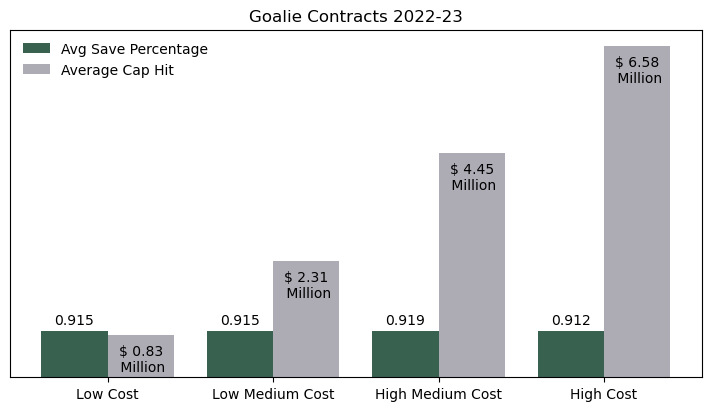

<Figure size 640x480 with 0 Axes>

In [56]:
fig, ax = plt.subplots(figsize=(7,4), layout='constrained')
cost_group_avg = goalie_cost_groups.groupby('Cost_Group', observed=True).mean(['SVPct_22', 'Cap_Hit_22', 'GSAA_22']).reset_index()
cost_group_avg['SVPct_22'] = round(cost_group_avg['SVPct_22'], 3)
cost_group_avg['Cap_Hit_22'] = round(cost_group_avg['Cap_Hit_22'], 2)

cap_hit_bar = [x/1000000 for x in cost_group_avg['Cap_Hit_22']]
cap_hit_label = ['{}'.format('$ ' + str(round(x,2)) + '\n' +' Million') for x in cap_hit_bar]

x = np.arange(len(cost_group_avg))
width = .4

ax1 = plt.bar(x,'SVPct_22', data=cost_group_avg, width=width, label='Avg Save Percentage', color='#386150')
ax2 = plt.bar(x+width, cap_hit_bar, data=cost_group_avg, width=width, label='Average Cap Hit', color='#ADACB5')

ax.set_title('Goalie Contracts 2022-23')
ax.bar_label(ax1, padding=3)
ax.bar_label(ax.containers[1], labels=cap_hit_label, padding= -28)

ax.legend(frameon=False)

ax.set_xticks(x+width/2, cost_group_avg['Cost_Group'])
ax.axes.get_yaxis().set_visible(False)
plt.show()
plt.clf()